In [111]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats.stats import pearsonr   
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
data_right = pd.read_excel('analyze_data_right.xlsx')
data_left = pd.read_excel('analyze_data_left.xlsx')
data_er = pd.read_excel('analyze_data_er.xlsx')

In [62]:
data_left[np.abs(data_left['regionale2010 vote']-data_left['regionale2015 vote']) < 50].shape

(22814, 22)

In [63]:
def compute_correlation(data):
    columns_list = data.columns.tolist()
    cor_right_party = pd.DataFrame(columns = columns_list[2:])
    counter = 2 # because the first 3 variables in the variable list are not important 
    for col in columns_list[2:]:
        extract_data = data[[columns_list[1], columns_list[counter]]]
        extract_data = extract_data.dropna()
        cor = pearsonr(extract_data[extract_data.columns[0]], extract_data[extract_data.columns[1]])[0] * 100
        cor_right_party[col] = [cor]
        counter += 1 
    return cor_right_party

In [69]:
def create_correlation_table(right,left,er):
    correlation_right_party = compute_correlation(right) 
    correlation_left_party = compute_correlation(left)
    corrleation_er_party = compute_correlation(er)
    correlation_table = pd.concat([correlation_left_party,correlation_right_party,correlation_er_party])
    correlation_table.index = ['Left','Right', 'Extreme Right']
    correlation_table = correlation_table.T
    return correlation_table

In [70]:
correlation_table = create_correlation_table(data_right,data_left,data_er)

In [71]:
correlation_table

Left      Right  Extreme Right
regionale2004 vote      64.688660  34.614008      67.331772
regionale2010 vote      -0.076994  71.784847      71.998575
Immigrant              -12.480203  20.117342     -10.755233
Salaire                 38.318189 -15.774859     -23.927632
Agriculteurs            17.898836  -3.876219     -10.988869
Artisans                -1.428497   9.725289      -8.881199
Cadres                   6.420419   1.926759     -11.209943
Prof_Intermediaire      -3.340594  -1.687218       2.111625
Employes                -9.659553  -4.289384      13.264534
Ouvrier                 -1.314590 -23.814793      27.399715
Retraite                 3.449550  14.949167     -19.263977
Autre                  -11.855126   4.547704      10.093556
Sans diplome            -5.213345  -8.784302      19.796930
CEP                     11.185025  -6.118871      -1.521515
BEPC                    -5.185977  13.399800      -5.434635
CAP-BEP                 -4.936157 -21.850844      25.678811
BAC                     -1.588563  11.317407     -12.159279
Enseignement_sup_court   0.336956   8.407505     -13.123457
Enseignement_sup_long    4.121381  18.979793     -28.263700
Proprietaire             6.055341 -14.208008       8.418358

### We export the correlation table

In [42]:
writer = pd.ExcelWriter('correlation_table_regional2015.xlsx')
correlation_table.to_excel(writer,'Sheet1') 
writer.save()

### We do some data viz

In [75]:
%matplotlib inline
import seaborn as sns

In [103]:
right = data_right.copy()

In [104]:
right = right.fillna(0)

In [105]:
right.head()

Code Insee  regionale2015 vote  regionale2004 vote  regionale2010 vote  \
0        1001               32.19                3.21               32.81   
1        1002               48.04                1.85               30.08   
2        1004               36.53                5.95               41.11   
3        1005               28.44                4.32               34.73   
4        1006               25.00                1.35               34.00   

   Immigrant    Salaire  Agriculteurs  Artisans     Cadres  \
0   4.173623   0.000000      2.588997  0.647249  12.944984   
1   2.105263   0.000000      0.000000  2.116402  10.582011   
2  12.048946  12.931137      0.000000  2.818540   6.451324   
3   4.528012   0.000000      0.000000  5.611068   8.147579   
4   8.000000   0.000000      0.000000  0.000000   4.651163   

   Prof_Intermediaire      ...        Retraite      Autre  Sans diplome  \
0           14.239482      ...       27.022654  12.297735     14.000000   
1           27.513228      ...       33.862434   4.232804      8.888889   
2           15.595920      ...       25.590551  15.211167     17.637173   
3           17.524981      ...       25.288240  10.607225     16.016949   
4           18.604651      ...       40.697674   9.302326     15.555556   

         CEP      BEPC    CAP-BEP        BAC  Enseignement_sup_court  \
0  13.454545  5.818182  25.272727  16.909091               15.272727   
1   6.666667  3.333333  22.222222  18.333333               21.111111   
2   9.362333  5.783490  24.824518  19.110232               13.109244   
3  12.033898  6.186441  29.491525  16.016949               11.610169   
4   7.777778  8.888889  32.222222  22.222222                6.666667   

   Enseignement_sup_long  Proprietaire  
0               9.454545     83.655084  
1              18.888889     83.404255  
2              10.173010     48.052800  
3               8.644068     79.415347  
4               7.777778     68.181818  

[5 rows x 22 columns]

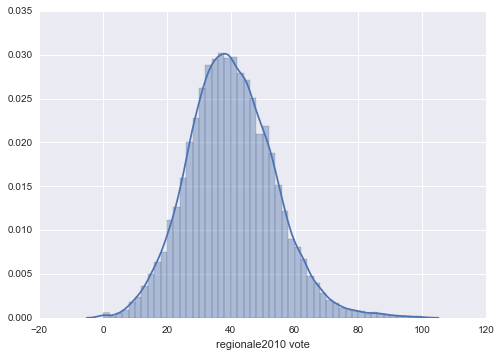

In [106]:
sns.distplot(right['regionale2010 vote'])

In [107]:
correlation_matrix = right[right.columns[1:]].corr()

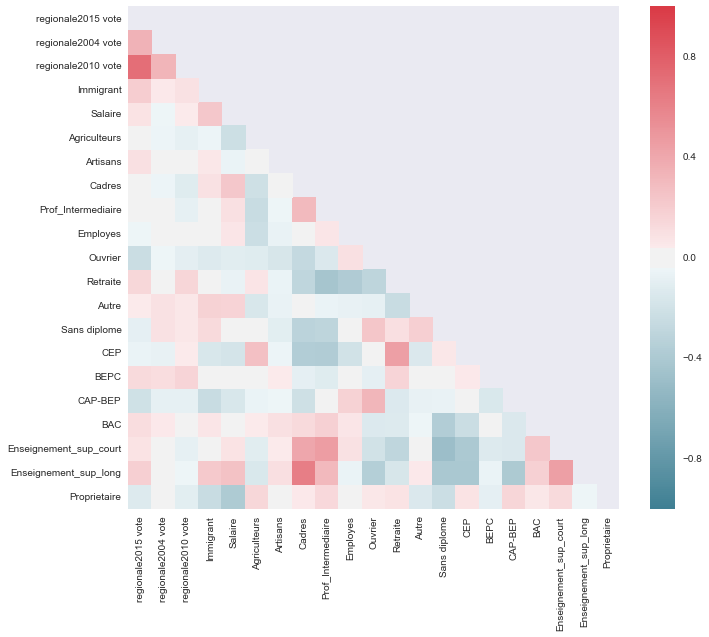

In [108]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap)
            #, vmax=.3,
            #square=True, xticklabels=5, yticklabels=5,
            #linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

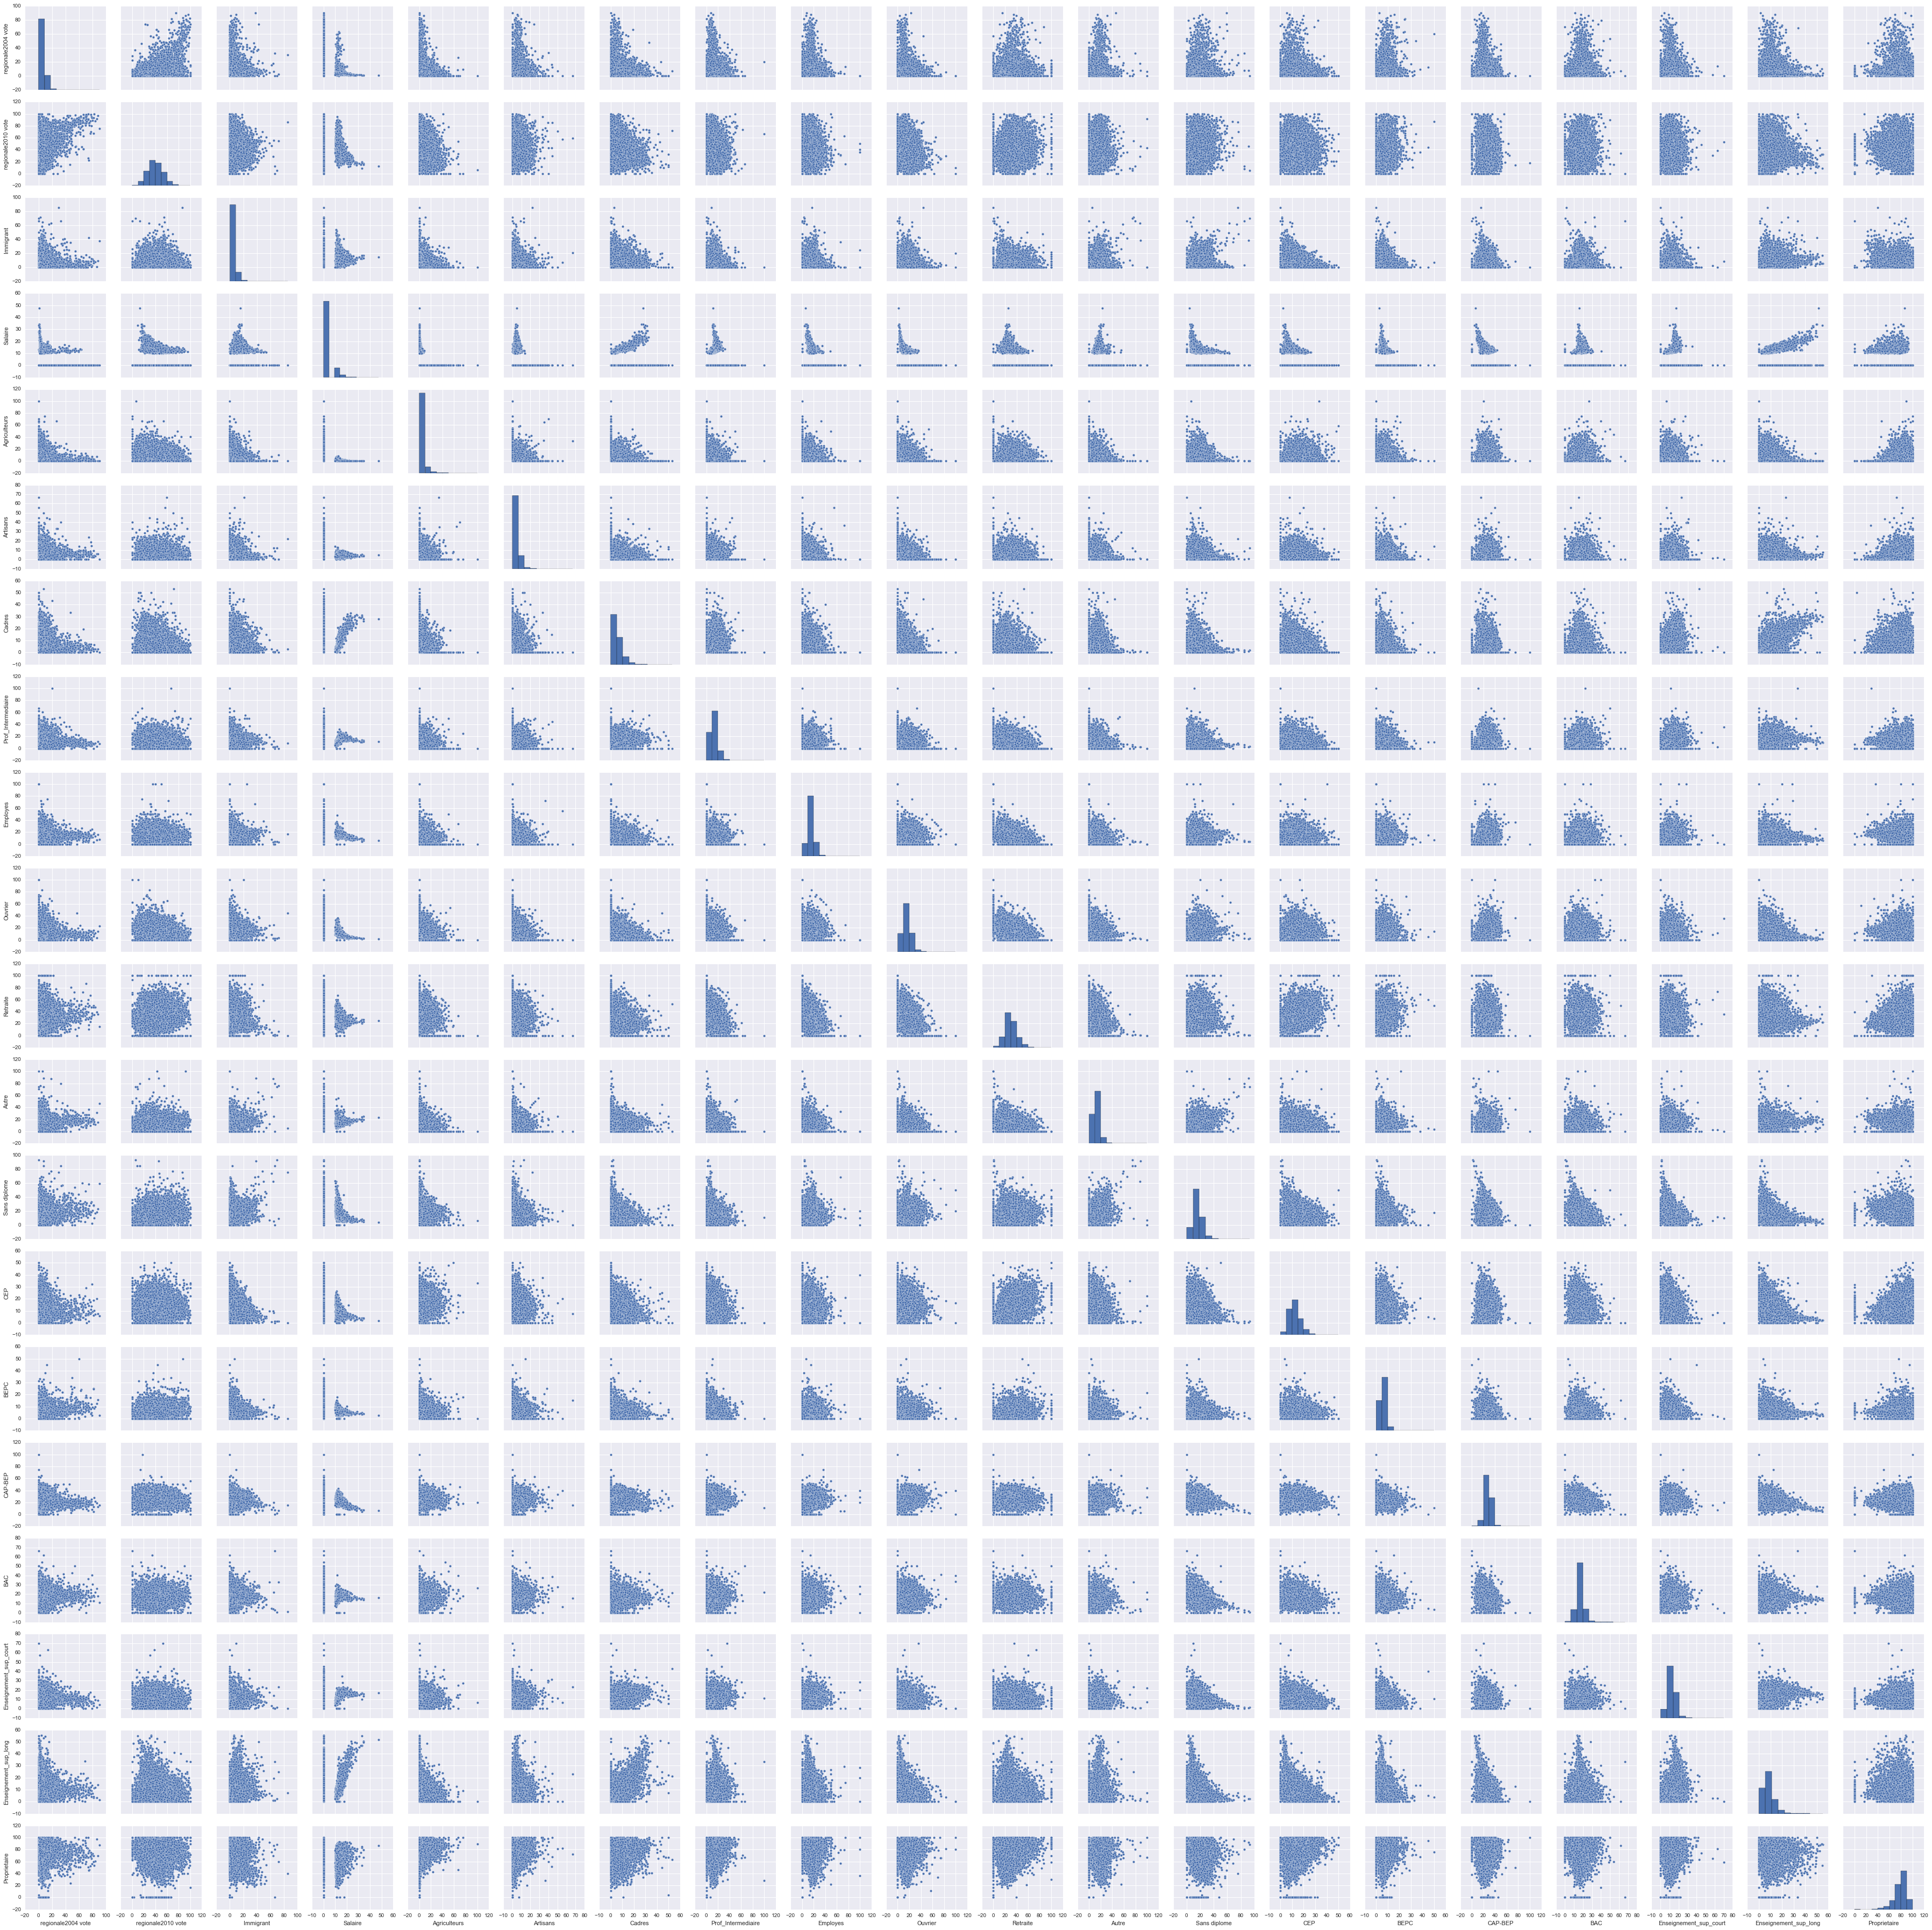

In [109]:
sns.pairplot(right[right.columns[2:]])

In [85]:
from sklearn import linear_model

In [86]:
lm = linear_model.LinearRegression()

In [114]:
right_drop_na[right_drop_na.columns[3:]].values

array([[ 17.63717252,   9.36233317,   5.78348987, ...,  15.21116679,
         12.04894605,  13.        ],
       [ 12.03861442,   7.83645656,   4.71323112, ...,  11.00579252,
          4.23280423,  13.        ],
       [ 32.13998391,   9.85518906,   5.10860821, ...,  14.8255814 ,
         30.71297989,  13.        ],
       ..., 
       [ 44.15986266,   3.27191424,   5.1983311 , ...,  29.46091456,
          1.63475828,  12.        ],
       [ 51.45354747,   3.35434031,   3.65928034, ...,  30.75801749,
          0.68990559,  11.        ],
       [ 62.94163831,   1.30855797,   7.38026695, ...,  33.74760994,
          0.45651129,  10.        ]])

In [115]:
lm.fit(right_drop_na[right_drop_na.columns[3:]].values,right_drop_na['% Voix/Exp'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
lm.predict(right_drop_na[right_drop_na.columns[3:]].values)

array([ 30.02571121,  32.78815169,  35.36610652, ...,  22.92424888,
        21.88769906,  20.46262525])

In [117]:
np.mean((lm.predict(right_drop_na[right_drop_na.columns[3:]].values) - right_drop_na['% Voix/Exp'].values) ** 2)

71.033221134058394

In [118]:
lm.score(right_drop_na[right_drop_na.columns[3:]].values,right_drop_na['% Voix/Exp'].values)

0.30388257941942354

In [164]:
# Generate artificial data (2 regressors + constant)
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     22.80
Date:                Fri, 19 Feb 2016   Prob (F-statistic):           7.66e-09
Time:                        15:01:42   Log-Likelihood:                -23.622
No. Observations:                 100   AIC:                             53.24
Df Residuals:                      97   BIC:                             61.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4001      0.080     17.510      0.000         1.241     1.559
x1             0.2225      0.105      2.127      0.036         0.015     0.430
x2             0.6580      0.107      6.157      0.000         0.446     0.870
==============================================================================
Omnibus:                       23.265   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.702
Skew:                          -0.316   Prob(JB):                       0.0350
Kurtosis:                       1.900   Cond. No.                         5.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
lm_right = sm.OLS(right[right.columns[1]],right[right.columns[2:]]).fit()
lm_right.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     regionale2015 vote   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 2.750e+04
Date:                Fri, 19 Feb 2016   Prob (F-statistic):               0.00
Time:                        15:02:00   Log-Likelihood:            -1.3112e+05
No. Observations:               36761   AIC:                         2.623e+05
Df Residuals:                   36741   BIC:                         2.625e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
regionale2004 vote         0.2892      0.009     33.670      0.000         0.272     0.306
regionale2010 vote         0.6759      0.004    187.773      0.000         0.669     0.683
Immigrant                  0.2354      0.010     22.467      0.000         0.215     0.256
Salaire                   -0.0470      0.011     -4.098      0.000        -0.070    -0.025
Agriculteurs               0.1632      0.011     14.450      0.000         0.141     0.185
Artisans                   0.2235      0.014     15.518      0.000         0.195     0.252
Cadres                    -0.0499      0.014     -3.529      0.000        -0.078    -0.022
Prof_Intermediaire         0.0265      0.010      2.571      0.010         0.006     0.047
Employes                   0.0089      0.010      0.924      0.356        -0.010     0.028
Ouvrier                   -0.0246      0.009     -2.733      0.006        -0.042    -0.007
Retraite                   0.1384      0.008     17.879      0.000         0.123     0.154
Autre                      0.0430      0.010      4.402      0.000         0.024     0.062
Sans diplome              -0.1455      0.009    -16.513      0.000        -0.163    -0.128
CEP                       -0.0725      0.011     -6.571      0.000        -0.094    -0.051
BEPC                      -0.0224      0.019     -1.207      0.228        -0.059     0.014
CAP-BEP                   -0.0767      0.009     -8.798      0.000        -0.094    -0.060
BAC                        0.0713      0.012      6.033      0.000         0.048     0.094
Enseignement_sup_court     0.2330      0.014     17.004      0.000         0.206     0.260
Enseignement_sup_long      0.3643      0.013     27.308      0.000         0.338     0.390
Proprietaire              -0.0807      0.005    -16.201      0.000        -0.090    -0.071
==============================================================================
Omnibus:                     6034.367   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31330.227
Skew:                           0.699   Prob(JB):                         0.00
Kurtosis:                       7.301   Cond. No.                         57.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
lm_left = sm.OLS(left[left.columns[1]],left[left.columns[2:]]).fit()
lm_left.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     regionale2015 vote   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.837e+04
Date:                Fri, 19 Feb 2016   Prob (F-statistic):               0.00
Time:                        14:41:14   Log-Likelihood:            -1.2946e+05
No. Observations:               36761   AIC:                         2.590e+05
Df Residuals:                   36741   BIC:                         2.591e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
regionale2004 vote         0.5687      0.004    156.250      0.000         0.562     0.576
regionale2010 vote        -0.2593      0.013    -20.424      0.000        -0.284    -0.234
Immigrant                 -0.0799      0.010     -7.889      0.000        -0.100    -0.060
Salaire                    0.1257      0.011     11.494      0.000         0.104     0.147
Agriculteurs               0.1186      0.011     10.709      0.000         0.097     0.140
Artisans                   0.0953      0.014      6.929      0.000         0.068     0.122
Cadres                     0.1835      0.014     13.530      0.000         0.157     0.210
Prof_Intermediaire         0.0768      0.010      7.809      0.000         0.057     0.096
Employes                   0.0189      0.009      2.074      0.038         0.001     0.037
Ouvrier                    0.0743      0.009      8.584      0.000         0.057     0.091
Retraite                   0.0608      0.007      8.295      0.000         0.046     0.075
Autre                     -0.0039      0.009     -0.420      0.675        -0.022     0.014
Sans diplome               0.0576      0.008      6.856      0.000         0.041     0.074
CEP                        0.1336      0.011     12.610      0.000         0.113     0.154
BEPC                       0.0197      0.018      1.125      0.260        -0.015     0.054
CAP-BEP                    0.0237      0.008      2.841      0.004         0.007     0.040
BAC                        0.0228      0.011      2.028      0.043         0.001     0.045
Enseignement_sup_court     0.0494      0.013      3.766      0.000         0.024     0.075
Enseignement_sup_long      0.1741      0.013     13.635      0.000         0.149     0.199
Proprietaire              -0.0065      0.005     -1.373      0.170        -0.016     0.003
==============================================================================
Omnibus:                     2519.513   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8954.158
Skew:                           0.290   Prob(JB):                         0.00
Kurtosis:                       5.347   Cond. No.                         57.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
from statsmodels.stats import outliers_influence

In [167]:
outliers_influence.variance_inflation_factor(left[left.columns[2:]],left[left.columns[1]])

TypeError: unhashable type

### Linear Regression

In [132]:
from sklearn import cross_validation, metrics

In [133]:
def modelfit(alg, dtrain, predictors, target):
    alg.fit(dtrain[predictors], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error') 
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print "\nModel Report"
    print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    print "R-squared: ", alg.score(dtrain[predictors], dtrain[target])
    


Model Report
RMSE : 8.567
CV Score : Mean - 8.652 | Std - 1.369 | Min - 6.727 | Max - 11.89
R-squared:  0.611793690138


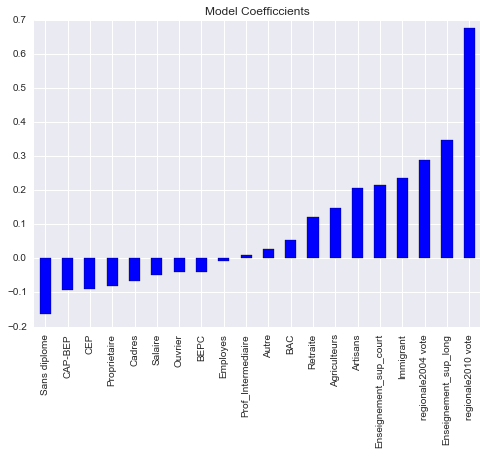

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
target = right.columns[1]
predictors = right.columns[2:]
lm = LinearRegression(normalize=True)
modelfit(lm, right, predictors, target)
coef1 = pd.Series(lm.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

### Baseline result

In [135]:
base_result = right[right.columns[1]].copy()

In [136]:
base_result[:] = base_result.mean(axis=0)

In [137]:
print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(right[right.columns[1]].values, base_result))

RMSE : 13.75


### Ridge regression


Model Report
RMSE : 8.851
CV Score : Mean - 8.885 | Std - 1.601 | Min - 6.879 | Max - 12.17
R-squared:  0.585598573235


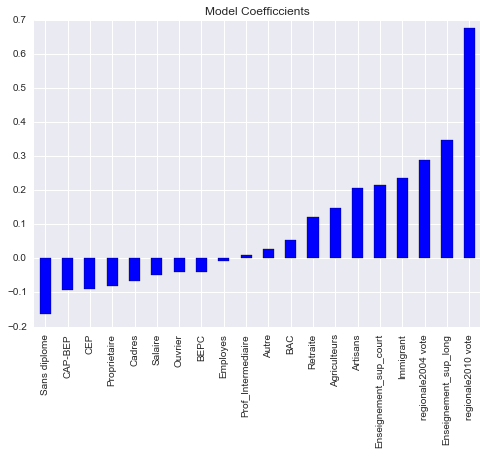

In [139]:
ridge_regression = Ridge(alpha = 0.3, normalize=True)
modelfit(ridge_regression, right, predictors, target)
coef1 = pd.Series(lm.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

### Lasso


Model Report
RMSE : 8.6
CV Score : Mean - 8.675 | Std - 1.378 | Min - 6.756 | Max - 11.76
R-squared:  0.608767894057


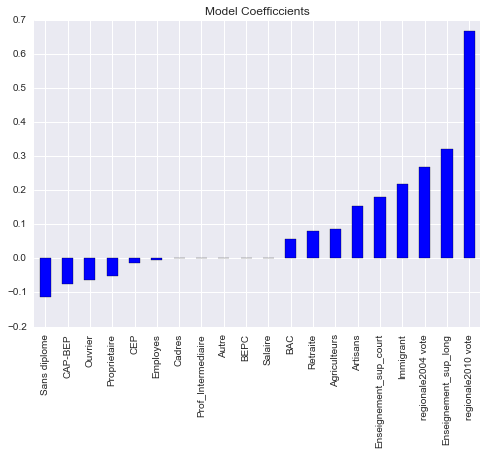

In [140]:
lasso_regression = Lasso(alpha = .001, normalize=True)
modelfit(lasso_regression, right, predictors, target)
coef1 = pd.Series(lasso_regression.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

## Elastic Net Reegression

In [142]:
from sklearn.linear_model import ElasticNet


Model Report
RMSE : 8.569
CV Score : Mean - 8.65 | Std - 1.378 | Min - 6.718 | Max - 11.89
R-squared:  0.61160379441


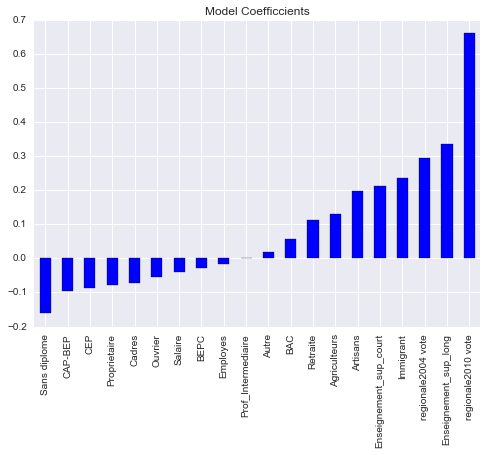

In [175]:
elastic_regression = ElasticNet(alpha = .000001 , normalize=True)
modelfit(elastic_regression, right, predictors, target)
coef1 = pd.Series(elastic_regression.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')

### Decision tree regression

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
decision_tree_regression = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [48]:
modelfit(decision_tree_regression, df, predictors, target)
coef1 = pd.Series(decision_tree_regression.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficcients')


Model Report
RMSE : 8.052
CV Score : Mean - 8.598 | Std - 2.292 | Min - 6.6 | Max - 16.24


AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'